In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [2]:
DIR_PATH = '../data/data-ocr/data-ocr'
filename = os.path.join(DIR_PATH, '0EAC26CF-CAA4-4B5B-B521-EA0E42EF650A.jpg')

In [30]:
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [31]:
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

In [32]:
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

In [33]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # minimum number of votes (intersections in Hough grid cell)
min_line_length = 50  # minimum number of pixels making up a line
max_line_gap = 20  # maximum gap in pixels between connectable line segments
line_image = np.copy(img) * 0  # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

In [34]:
len(lines)

2585

In [35]:
lines2 = lines.squeeze(1)

In [36]:
d_lines = pd.DataFrame(lines2, columns=['x1', 'y1', 'x2', 'y2'])

In [37]:
d_lines['width'] = (d_lines.x1 - d_lines.x2).abs()

In [38]:
d_lines['height'] = (d_lines.y1 - d_lines.y2).abs()

In [39]:
d_lines['is_horizontal'] = d_lines.width > d_lines.height

In [45]:
d_lines.groupby('is_horizontal').count()

,x1,y1,x2,y2,width,height
is_horizontal,,,,,,
False,612,612,612,612,612,612
True,1973,1973,1973,1973,1973,1973


In [41]:
for idx, row in d_lines[~d_lines.is_horizontal].iterrows():
    cv2.line(line_image,(row.x1,row.y1),(row.x2,row.y2),(255,0,0),5)

In [42]:
# Draw the lines on the  image
lines_edges2 = cv2.addWeighted(img, 0.8, line_image, 1, 0)

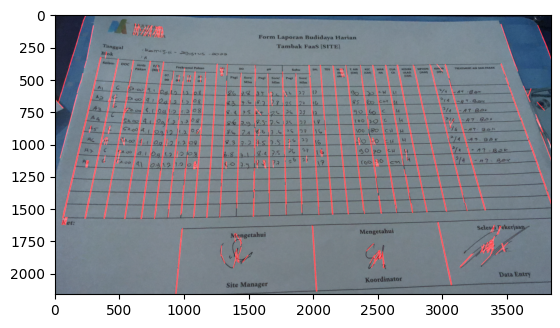

In [43]:
plt.imshow(lines_edges2)

In [44]:
cv2.imwrite('linedetection_vertical.jpg', lines_edges2)

True